In [1]:
import pandas as pd
import psycopg2
from config import *

In [2]:
conn = psycopg2.connect(
   database=DATABASE, user=USER, password=PASSWORD, host=HOST, port= PORT
)

In [3]:
cursor = conn.cursor()

In [4]:
cursor.execute("Select * FROM races LIMIT 0")
colnames = [desc[0] for desc in cursor.description]
colnames

['raceId', 'year', 'round', 'circuitId', 'name', 'date', 'time', 'url']

In [5]:
cursor.execute("SELECT * FROM races")
data = cursor.fetchall()
race_df = pd.DataFrame(data, columns=colnames)
race_df.head()

,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


In [6]:
cursor.execute("Select * FROM results LIMIT 0")
colnames = [desc[0] for desc in cursor.description]
colnames

['resultId',
 'raceId',
 'driverId',
 'constructorId',
 'number',
 'grid',
 'position',
 'positionText',
 'positionOrder',
 'points',
 'laps',
 'time',
 'milliseconds',
 'fastestLap',
 'rank',
 'fastestLapTime',
 'fastestLapSpeed',
 'statusId']

In [7]:
cursor.execute("SELECT * FROM results")
data = cursor.fetchall()
results_df = pd.DataFrame(data, columns=colnames)
results_df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [8]:
raceresults_df = results_df.merge(race_df,left_on='raceId',right_on='raceId',how='left')

In [9]:
raceresults_df = raceresults_df.dropna().reset_index()

In [10]:
raceresults_df.head()

,index,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,...,fastestLapTime,fastestLapSpeed,statusId,year,round,circuitId,name,date,time_y,url
0,0,1,18,1,1,22,1,1,1,1,...,1:27.452,218.300,1,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...
1,1,2,18,2,2,3,5,2,2,2,...,1:27.739,217.586,1,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...
2,2,3,18,3,3,7,7,3,3,3,...,1:28.090,216.719,1,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...
3,3,4,18,4,4,5,11,4,4,4,...,1:28.603,215.464,1,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...
4,4,5,18,5,1,23,3,5,5,5,...,1:27.418,218.385,1,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...


In [11]:
file_path = "../Resources/PythonExport/weather.csv"
weather_df = pd.read_csv(file_path)
weather_df.head()

,Unnamed: 0,raceId,year,round,weather,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy
0,0,1,2009,1,Sunny with temperatures reaching up to 27 °C (...,1,0,0,0,0
1,1,2,2009,2,"Dry start, with heavy rain and thunderstorm/mo...",0,0,1,1,0
2,2,3,2009,3,Rain,0,0,0,1,0
3,3,4,2009,4,Sunny,1,0,0,0,0
4,4,5,2009,5,"Warm, Sunny",1,0,0,0,0


In [12]:
df = raceresults_df.merge(weather_df,left_on='raceId',right_on='raceId',how='left')
df.head()

,index,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,...,url,Unnamed: 0,year_y,round_y,weather,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy
0,0,1,18,1,1,22,1,1,1,1,...,http://en.wikipedia.org/wiki/2008_Australian_G...,17,2008,1,"Sunny,very hot with air temperature 39°C.",1,0,0,0,0
1,1,2,18,2,2,3,5,2,2,2,...,http://en.wikipedia.org/wiki/2008_Australian_G...,17,2008,1,"Sunny,very hot with air temperature 39°C.",1,0,0,0,0
2,2,3,18,3,3,7,7,3,3,3,...,http://en.wikipedia.org/wiki/2008_Australian_G...,17,2008,1,"Sunny,very hot with air temperature 39°C.",1,0,0,0,0
3,3,4,18,4,4,5,11,4,4,4,...,http://en.wikipedia.org/wiki/2008_Australian_G...,17,2008,1,"Sunny,very hot with air temperature 39°C.",1,0,0,0,0
4,4,5,18,5,1,23,3,5,5,5,...,http://en.wikipedia.org/wiki/2008_Australian_G...,17,2008,1,"Sunny,very hot with air temperature 39°C.",1,0,0,0,0


In [13]:
df.drop(columns=['index','resultId','raceId','url','time_y','date','round_y','position','positionText','number','points','laps','time_x','milliseconds','fastestLap','rank','year_y','Unnamed: 0','weather','round_x','name','fastestLapSpeed','fastestLapTime'],inplace=True)

In [14]:
df

,driverId,constructorId,grid,positionOrder,statusId,year_x,circuitId,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy
0,1,1,1,1,1,2008,1,1,0,0,0,0
1,2,2,5,2,1,2008,1,1,0,0,0,0
2,3,3,7,3,1,2008,1,1,0,0,0,0
3,4,4,11,4,1,2008,1,1,0,0,0,0
4,5,1,3,5,1,2008,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
25035,849,3,19,16,11,2021,4,0,0,0,0,1
25036,4,214,10,17,11,2021,4,0,0,0,0,1
25037,854,210,18,18,12,2021,4,0,0,0,0,1
25038,853,210,20,19,12,2021,4,0,0,0,0,1


In [15]:
df.dtypes

driverId          int64
constructorId     int64
grid              int64
positionOrder     int64
statusId          int64
year_x            int64
circuitId         int64
weather_warm      int64
weather_cold      int64
weather_dry       int64
weather_wet       int64
weather_cloudy    int64
dtype: object

In [16]:
# We will finish all the statuses where drivers finish the race to 2
replace = {
    11:2, 12:2, 13:2, 14:2, 15:2, 16:2, 17:2, 18:2, 19:2, 45:2, 50:2, 128:2, 53:2, 55:2, 58:2, 
    88:2, 111:2, 112:2, 113:2, 114:2, 115:2, 116:2, 117:2, 118:2, 119:2, 120:2, 122:2, 123:2, 124:2, 
    125:2, 127:2, 133:2, 134:2  
}
df["statusId"] = df["statusId"].replace(replace)

In [17]:
# Transform finish_status column. Anything which is not 1 (driver did not finish race) is converted to 3
def change_status(x):
    if x == 1:
        return 1
    elif x == 2:
        return 2
    else:
        return 3
    
df["statusId"] = df["statusId"].apply(change_status)
df.tail(10)

,driverId,constructorId,grid,positionOrder,statusId,year_x,circuitId,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy
25030,840,117,11,11,2,2021,4,0,0,0,0,1
25031,8,51,17,12,2,2021,4,0,0,0,0,1
25032,20,117,13,13,2,2021,4,0,0,0,0,1
25033,847,3,15,14,2,2021,4,0,0,0,0,1
25034,841,51,14,15,2,2021,4,0,0,0,0,1
25035,849,3,19,16,2,2021,4,0,0,0,0,1
25036,4,214,10,17,2,2021,4,0,0,0,0,1
25037,854,210,18,18,2,2021,4,0,0,0,0,1
25038,853,210,20,19,2,2021,4,0,0,0,0,1
25039,852,213,16,20,3,2021,4,0,0,0,0,1


In [18]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(df.statusId.values.reshape(-1,1)))

# Rename encoded columns
encode_df.columns = enc.get_feature_names(['statusId'])
encode_df.head()

,statusId_1,statusId_2,statusId_3
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [19]:
df = df.merge(encode_df,left_index=True,right_index=True).drop("statusId",1)

In [20]:
# # Fit the encoder and produce encoded DataFrame
# encode_df = pd.DataFrame(enc.fit_transform(df.grid.values.reshape(-1,1)))
# # Rename encoded columns
# encode_df.columns = enc.get_feature_names(['grid'])
# df = df.merge(encode_df,left_index=True,right_index=True).drop("grid",1)

In [21]:
# # Fit the encoder and produce encoded DataFrame
# encode_df = pd.DataFrame(enc.fit_transform(df.driverId.values.reshape(-1,1)))
# # Rename encoded columns
# encode_df.columns = enc.get_feature_names(['driverId'])
# df = df.merge(encode_df,left_index=True,right_index=True).drop("driverId",1)

In [22]:
# # Fit the encoder and produce encoded DataFrame
# encode_df = pd.DataFrame(enc.fit_transform(df.constructorId.values.reshape(-1,1)))
# # Rename encoded columns
# encode_df.columns = enc.get_feature_names(['constructorId'])
# df = df.merge(encode_df,left_index=True,right_index=True).drop("constructorId",1)

In [23]:
# df.head()

In [24]:
# # Fit the encoder and produce encoded DataFrame
# encode_df = pd.DataFrame(enc.fit_transform(df.circuitId.values.reshape(-1,1)))
# # Rename encoded columns
# encode_df.columns = enc.get_feature_names(['circuitId'])
# df = df.merge(encode_df,left_index=True,right_index=True).drop("circuitId",1)

In [25]:
df_train = df[df['year_x']<=2018]
df_test = df[df['year_x']==2019]

In [26]:
y_train= df_train['positionOrder']
y_test= df_test['positionOrder']
X_train = df_train['grid']
# .drop(columns=['positionOrder','driverId','constructorId','circuitId','year_x'])
X_test = df_test['grid']
# X_test = df_test.drop(columns=['positionOrder','driverId','constructorId','circuitId','year_x'])

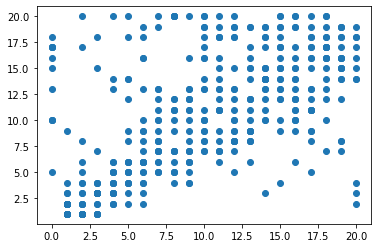

In [45]:
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test)
plt.show()

In [38]:
X_train

0         1
1         5
2         7
3        11
4         3
         ..
24195     4
24196    10
24297    15
24298     1
24299    18
Name: grid, Length: 24200, dtype: int64

In [39]:
import tensorflow as tf
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=12, activation="linear", input_dim=1))
# nn_model.add(tf.keras.layers.Dense(units=4, activation="linear"))
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1))
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 12)                24        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 13        
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [40]:
nn_model.compile(optimizer="SGD", loss="mse", metrics=['mae','accuracy'])

In [41]:
fit_model = nn_model.fit(X_train, y_train, epochs=50)

Epoch 1/50
757/757 [==============================] - 1s 579us/step - loss: nan - mae: nan - accuracy: 1.2397e-04
Epoch 2/50
757/757 [==============================] - 0s 569us/step - loss: nan - mae: nan - accuracy: 0.0000e+00
Epoch 3/50
757/757 [==============================] - 0s 552us/step - loss: nan - mae: nan - accuracy: 0.0000e+00
Epoch 4/50
757/757 [==============================] - 0s 549us/step - loss: nan - mae: nan - accuracy: 0.0000e+00
Epoch 5/50
757/757 [==============================] - 0s 548us/step - loss: nan - mae: nan - accuracy: 0.0000e+00
Epoch 6/50
757/757 [==============================] - 0s 540us/step - loss: nan - mae: nan - accuracy: 0.0000e+00
Epoch 7/50
757/757 [==============================] - 0s 555us/step - loss: nan - mae: nan - accuracy: 0.0000e+00
Epoch 8/50
757/757 [==============================] - 0s 542us/step - loss: nan - mae: nan - accuracy: 0.0000e+00
Epoch 9/50
757/757 [==============================] - 0s 552us/step - loss: nan - mae: n

In [42]:
nn_model.evaluate(X_test,y_test,verbose=2)

14/14 - 0s - loss: nan - mae: nan - accuracy: 0.0000e+00


[nan, nan, 0.0]